In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

**Challenge 1**

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
dat = np.random.randint(1,10)*np.log(np.linspace(1,100))+np.random.randint(10,50)+np.random.normal()

In [52]:
# Setup DataFrame

df = pd.DataFrame(dat, columns=['Y'])
df['int'] = [1 for x in list(range(len(dat)))]
df['X1'] = [x for x in list(range(1,len(dat)+1))]

In [4]:
y = df['Y']
x = df.drop(['Y'],1)

In [5]:
# Quadratic fit

x2 = x**2

lsm = sm.OLS(y,x2)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     68.83
Date:                Fri, 24 Feb 2017   Prob (F-statistic):           7.88e-11
Time:                        19:39:36   Log-Likelihood:                -144.23
No. Observations:                  50   AIC:                             292.5
Df Residuals:                      48   BIC:                             296.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
int           57.1733      0.944     60.593      0.000        55.276    59.070
X1             0.0068      0.001      8.296      0.000         0.005     0.008
==============================================================================
Omnibus:                       42.511   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.188
Skew:                          -2.323   Prob(JB):                     1.33e-31
Kurtosis:                       9.831   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Logarithmic fit

logx = df.drop(['Y'], 1)
logx['X1'] = np.log(x['X1'])

lsm = sm.OLS(y,logx)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Sat, 25 Feb 2017   Prob (F-statistic):           8.29e-58
Time:                        21:36:37   Log-Likelihood:                -31.811
No. Observations:                  50   AIC:                             67.62
Df Residuals:                      48   BIC:                             71.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
int           40.2977      0.232    173.558      0.000        39.831    40.765
X1             7.6576      0.075    102.149      0.000         7.507     7.808
==============================================================================
Omnibus:                       70.054   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.022
Skew:                          -3.555   Prob(JB):                    1.92e-179
Kurtosis:                      21.560   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Challenge 2**

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [7]:
logx_2 = logx.drop(['int'],1)

In [8]:
lr1 = make_pipeline(LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(logx_2, y, test_size=.25)
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

0.99465995690064146

In [9]:
y_pred_train = lr1.predict(X_train)
y_pred_test = lr1.predict(X_test)

In [10]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [11]:
mse_train

0.25960562295900724

In [12]:
mse_test

0.071996220920748435

**Challenge 3**

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

In [77]:
y

0     37.685944
1     45.423688
2     49.008921
3     51.368274
4     53.129722
5     54.535847
6     55.706215
7     56.708647
8     57.585344
9     58.364361
10    59.065300
11    59.702396
12    60.286313
13    60.825250
14    61.325643
15    61.792640
16    62.230421
17    62.642427
18    63.031525
19    63.400129
20    63.750291
21    64.083767
22    64.402077
23    64.706540
24    64.998310
25    65.278404
26    65.547720
27    65.807058
28    66.057129
29    66.298575
30    66.531969
31    66.757832
32    66.976634
33    67.188804
34    67.394732
35    67.594774
36    67.789258
37    67.978485
38    68.162731
39    68.342251
40    68.517282
41    68.688043
42    68.854738
43    69.017555
44    69.176671
45    69.332250
46    69.484447
47    69.633405
48    69.779259
49    69.922136
Name: Y, dtype: float64

In [94]:
df.drop(['int'],axis=1)

,Y,X1
0,37.685944,1
1,45.423688,2
2,49.008921,3
3,51.368274,4
4,53.129722,5
5,54.535847,6
6,55.706215,7
7,56.708647,8
8,57.585344,9
9,58.364361,10


In [100]:
y.reshape(1,50)

array([[ 37.68594435,  45.42368818,  49.00892062,  51.36827369,
         53.12972224,  54.53584699,  55.70621533,  56.70864696,
         57.58534388,  58.36436139,  59.0653002 ,  59.70239557,
         60.28631287,  60.82524974,  61.32564316,  61.79264014,
         62.23042091,  62.64242689,  63.03152508,  63.40012924,
         63.75029064,  64.08376722,  64.40207693,  64.70653959,
         64.99830989,  65.27840383,  65.54772012,  65.80705754,
         66.05712924,  66.29857453,  66.53196877,  66.75783161,
         66.97663395,  67.18880388,  67.39473167,  67.59477414,
         67.78925838,  67.97848492,  68.16273057,  68.34225083,
         68.51728205,  68.68804326,  68.85473785,  69.01755501,
         69.17667103,  69.33225045,  69.48444707,  69.63340487,
         69.77925882,  69.92213565]])

In [132]:
x = PolynomialFeatures(1).fit_transform(df.drop(['Y','int'],axis=1))
x

array([[  1.,   1.],
       [  1.,   2.],
       [  1.,   3.],
       [  1.,   4.],
       [  1.,   5.],
       [  1.,   6.],
       [  1.,   7.],
       [  1.,   8.],
       [  1.,   9.],
       [  1.,  10.],
       [  1.,  11.],
       [  1.,  12.],
       [  1.,  13.],
       [  1.,  14.],
       [  1.,  15.],
       [  1.,  16.],
       [  1.,  17.],
       [  1.,  18.],
       [  1.,  19.],
       [  1.,  20.],
       [  1.,  21.],
       [  1.,  22.],
       [  1.,  23.],
       [  1.,  24.],
       [  1.,  25.],
       [  1.,  26.],
       [  1.,  27.],
       [  1.,  28.],
       [  1.,  29.],
       [  1.,  30.],
       [  1.,  31.],
       [  1.,  32.],
       [  1.,  33.],
       [  1.,  34.],
       [  1.,  35.],
       [  1.,  36.],
       [  1.,  37.],
       [  1.,  38.],
       [  1.,  39.],
       [  1.,  40.],
       [  1.,  41.],
       [  1.,  42.],
       [  1.,  43.],
       [  1.,  44.],
       [  1.,  45.],
       [  1.,  46.],
       [  1.,  47.],
       [  1.,

In [82]:
np.asarray(y)

array([ 37.68594435,  45.42368818,  49.00892062,  51.36827369,
        53.12972224,  54.53584699,  55.70621533,  56.70864696,
        57.58534388,  58.36436139,  59.0653002 ,  59.70239557,
        60.28631287,  60.82524974,  61.32564316,  61.79264014,
        62.23042091,  62.64242689,  63.03152508,  63.40012924,
        63.75029064,  64.08376722,  64.40207693,  64.70653959,
        64.99830989,  65.27840383,  65.54772012,  65.80705754,
        66.05712924,  66.29857453,  66.53196877,  66.75783161,
        66.97663395,  67.18880388,  67.39473167,  67.59477414,
        67.78925838,  67.97848492,  68.16273057,  68.34225083,
        68.51728205,  68.68804326,  68.85473785,  69.01755501,
        69.17667103,  69.33225045,  69.48444707,  69.63340487,
        69.77925882,  69.92213565])

In [106]:
polyX = PolynomialFeatures(1).fit_transform(df['X1'])
X_train, X_test, y_train, y_test = train_test_split(polyX, y.reshape(1,50), test_size=0.3)

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [116]:
x = np.linspace(0,1)
x

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

(-1, 5)

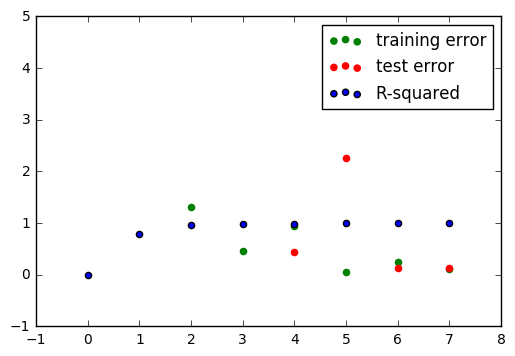

In [158]:
degree = range(8)
training_error = []
test_error = []
R_squared = []
AIC = []

for i in degree:
    polyX = PolynomialFeatures(i).fit_transform(df.drop(['Y','int'],axis=1))
    X_train, X_test, y_train, y_test = train_test_split(polyX, y, test_size=0.3)
    model = sm.OLS(y_train, X_train)
    fit = model.fit()
    y_train_predicted = fit.predict(X_train)
    training_error.append(mean_squared_error(y_train, y_train_predicted))
    y_test_predicted = fit.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_predicted))
    R_squared.append(fit.rsquared)
    AIC.append(fit.aic)

plt.scatter(degree, training_error, color='g', label='training error')
plt.scatter(degree, test_error, color='r', label='test error')
plt.scatter(degree, R_squared, label='R-squared')
plt.legend()
plt.ylim([-1,5])

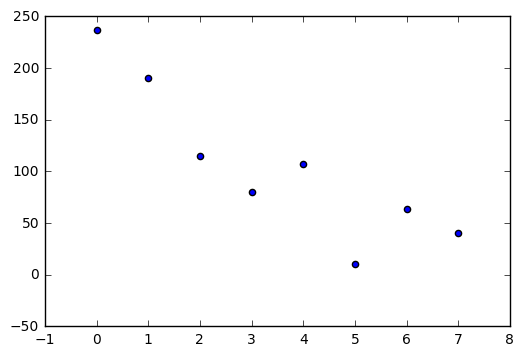

In [159]:
plt.scatter(degree, AIC);

**Challenge 4**

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [160]:
polyX = PolynomialFeatures(2).fit_transform(df.drop(['Y','int'],axis=1))
X_train, X_test, y_train, y_test = train_test_split(polyX, y, test_size=0.3)

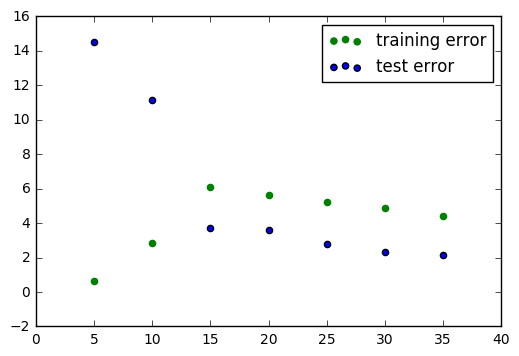

In [161]:
ms = [5,10,15,20,25,30,35]
training_error = []
test_error = []

for m in ms:
    model = sm.OLS(y_train[0:m], X_train[0:m])
    fit = model.fit()
    y_train_predicted = fit.predict(X_train[0:m])
    training_error.append(metrics.mean_squared_error(y_train[0:m], y_train_predicted))
    y_test_predicted = fit.predict(X_test)
    test_error.append(metrics.mean_squared_error(y_test, y_test_predicted))

plt.scatter(ms, training_error, color='g', label='training error')
plt.scatter(ms, test_error, label='test error')
plt.legend();